<h1 style="color: indigo; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 48px;">Bike Sharing Assignment</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
In this case study, we will be applying concepts learned as part of linear regression.
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
<strong>Problem Statement</strong>
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px;">
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.Required to model the demand for shared bikes with the available independent variables.

- Which variables are significant in predicting the demand for shared bikes.- 
How well those variables describe the bike demands
</p>

<h2> Importing liabraries and initial checks </h2>

In [1]:
# Importing Necessary Libraries and Functions

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Numpy and Pandas Library

import numpy as np
import pandas as pd

#Import Matplotlib and Seaborn Libraries for Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

#Using Pandas Inbuilt function to visualize all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing MinMaxScaler function for feature scaling

from sklearn.preprocessing import MinMaxScaler

# Using sklearn library and importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing statsmodel library

import statsmodels.api as sm

#Using statsmodel library and importing variance_inflation_factor function

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Using statsmodel library and importing R-square function

from sklearn.metrics import r2_score

In [2]:
bike_df = pd.read_csv('day.csv')

In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


<h3 style="color: orange;">Insights by just looking at the data </h3>

- The dataset consist of 730 rows and 16 columns.
- There are no null values present in the dataset.

<h2> Data Prepration </h2>

<h5 style="color: blue;"> Dropping below clolumns : </h5>

- instant : No need of having one more index
- dteday : Keeping date speratre won't make much sense, we anyways have month and year columns
- Casual : Similar like target variable
- registered : Similar like target variable

In [10]:
#dropping irrevelant columns
bike_df.drop(columns = ['dteday','casual', 'registered', 'instant'], inplace = True)

<h5 style="color: blue;"> As per data dictionary few columns have string columns, that is currently represnted in numeric in dataframe. Converting them into string </h5>

In [12]:
bike_df['season'] = bike_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [13]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear',2:'Mist ',3:'Light Snow & Rain',4:'Heavy Rain & Snow'})

In [14]:
bike_df['weekday'] = bike_df['weekday'].map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [15]:
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                        ,9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [17]:
bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


<h2> EDA </h2>

<h5 style="color: blue;">Plotting numercical and Categorical seprately. We have seprated categorical column based on cardinality</h5>

In [20]:
NumericFeatures = bike_df.select_dtypes(include=['int64','float64']).columns.tolist()
CharacterFeatures = bike_df.select_dtypes(include=['object']).columns.tolist()
NumericFeaturesCardinality = bike_df[NumericFeatures].nunique(dropna=False)
CharacterFeaturesCardinality = bike_df[CharacterFeatures].nunique(dropna=False)

In [21]:
NumericFeaturesCardinality

yr              2
holiday         2
workingday      2
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [22]:
CharacterFeaturesCardinality

season         4
mnth          12
weekday        7
weathersit     3
dtype: int64

In [23]:
FeaturesForContinuous= NumericFeaturesCardinality[NumericFeaturesCardinality >= 13].index.to_list()
FeaturesForCategorical = CharacterFeaturesCardinality[CharacterFeaturesCardinality < 13].index.to_list() + NumericFeaturesCardinality[NumericFeaturesCardinality < 13].index.to_list()

<h5 style="color: blue;"> Plotting continuos variable </h5>

<Figure size 2000x1200 with 0 Axes>

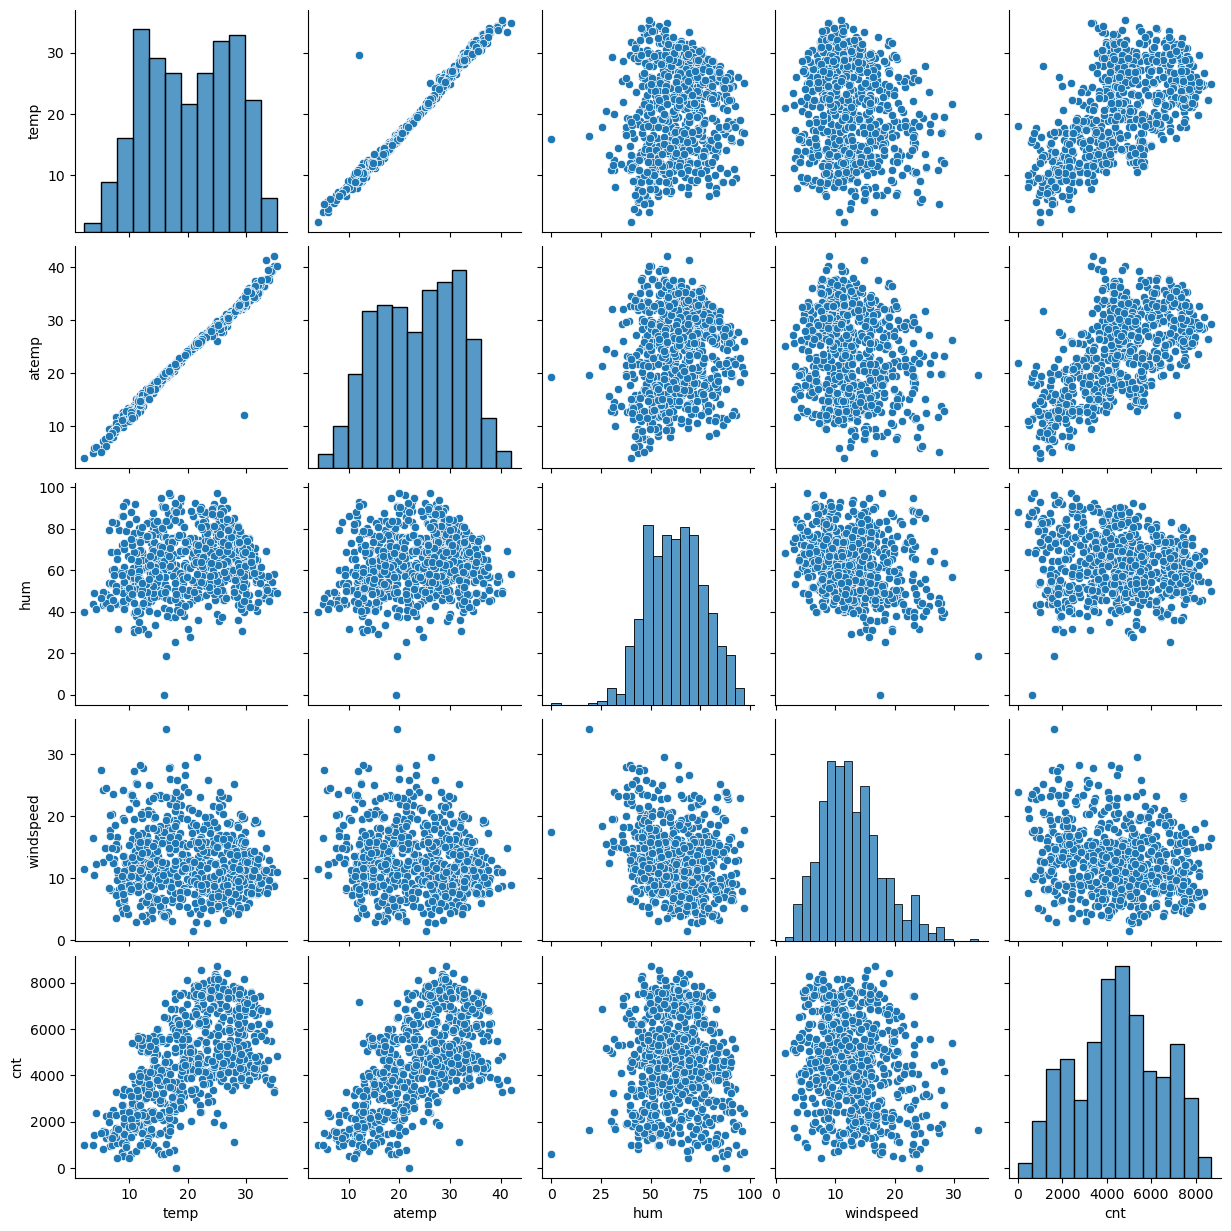

In [25]:
plt.figure(figsize=(20, 12))
sns.pairplot(bike_df[FeaturesForContinuous]) 
plt.show() 

<h6 style="color: orange;">Insights</h6>

- Linearity can be seen between cnt and temp.
- Linearity can be seen between cnt and atemp.
- We have atleast one linear relationship, hence we are good to build linear model

<h5 style="color: blue;"> Plotting Categorical features </h5>

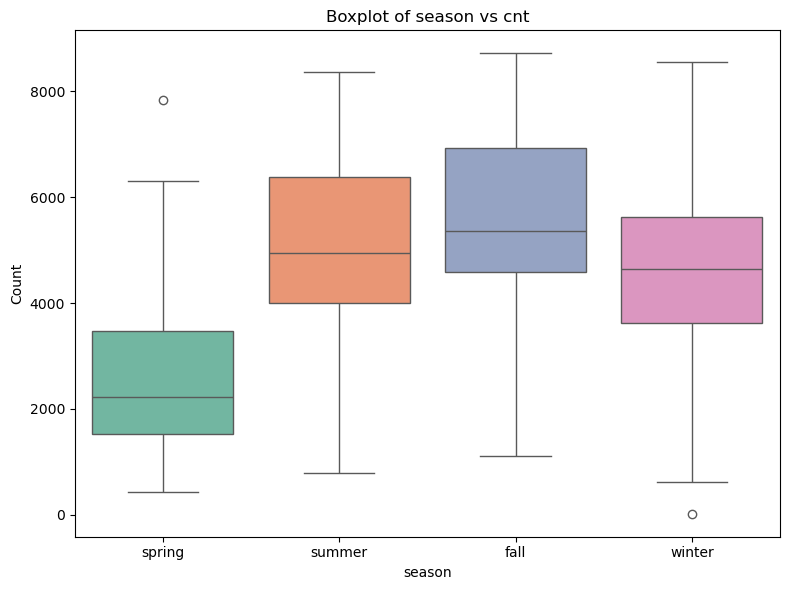

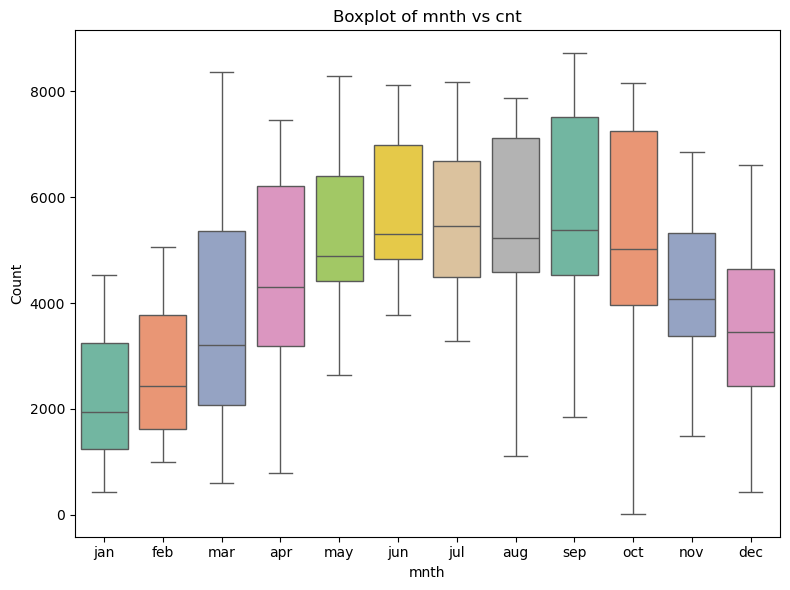

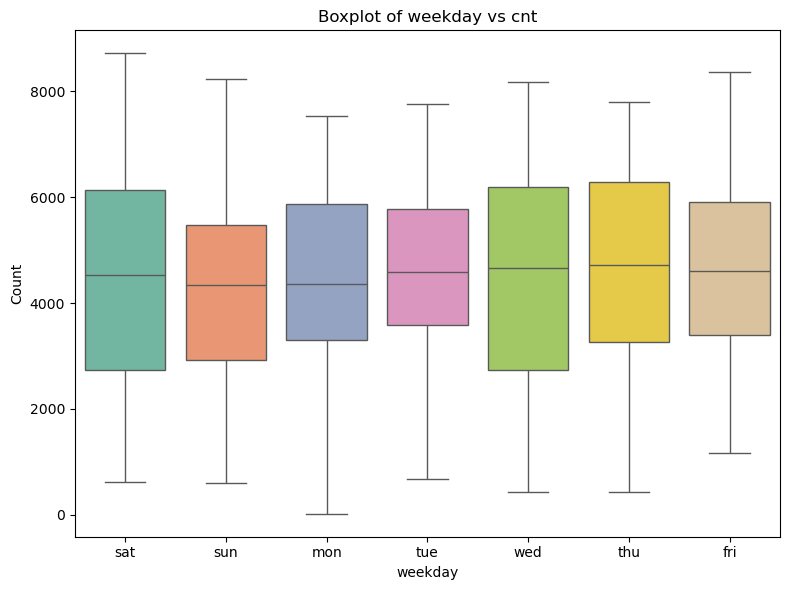

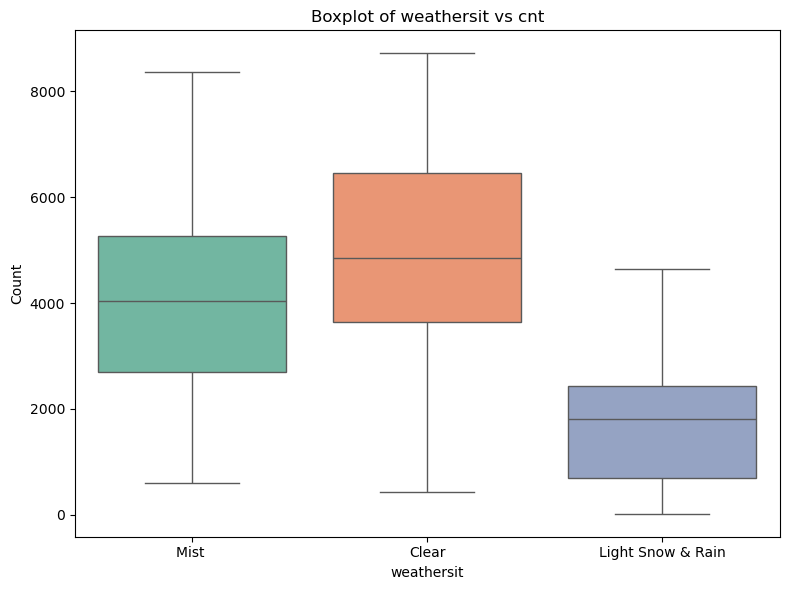

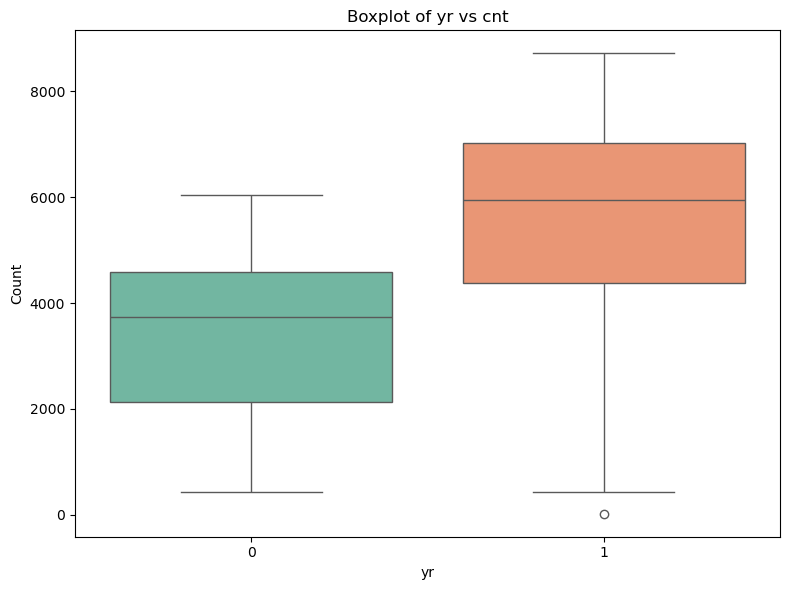

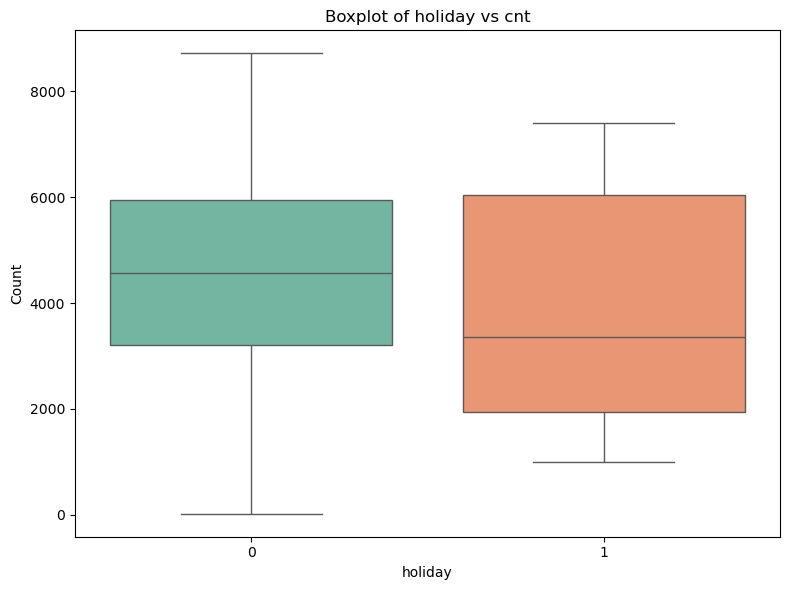

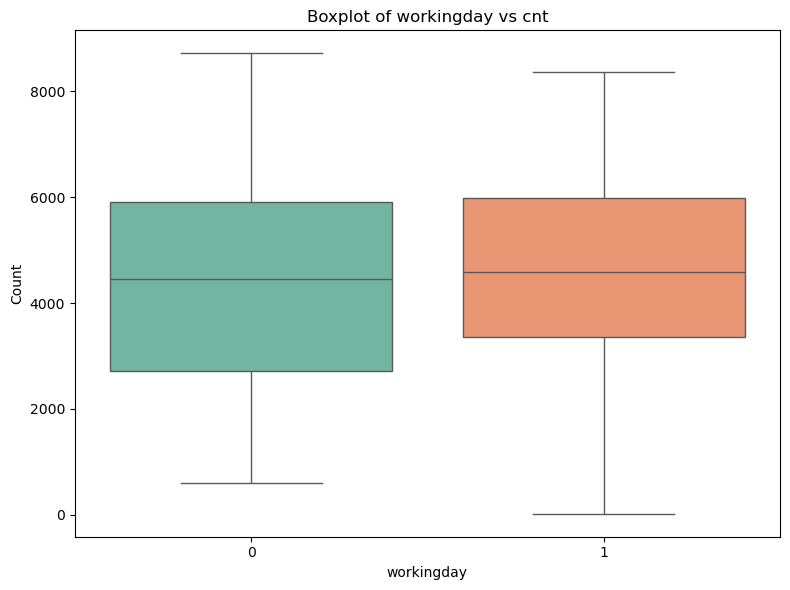

In [28]:
for col in FeaturesForCategorical:
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.boxplot(x=bike_df[col], y=bike_df['cnt'], palette="Set2")  # Using the 'Set2' palette for distinct colors
    
    # Add titles and labels for clarity
    plt.title(f'Boxplot of {col} vs cnt')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<h6 style="color: orange;">Insights</h6>

- Seasonal Demand: Among the seasons, Spring is observed to have the lowest demand for bike sharing compared to other seasons.
- Weather Conditions: The presence of light snow and rain leads to a noticeable decrease in the demand for bike sharing. Adverse weather conditions deter users from opting for bike sharing.
- Annual Trends: The year 2019 witnessed a significant increase in the demand for bike sharing, indicating a growing popularity or expanded availability during this period.
- Impact of Holidays: There is an observed increase in bike sharing demand during holidays. This could be attributed to more recreational and leisure activities during these times.
- Monthly Trends: There is an increasing trend in the number of bikes rented from January to September. However, there is a noticeable dip in demand during the months of November and December, possibly due to colder weather conditions affecting user preference.
- Daily Variations: The variation in the number of bikes rented across different days of the week is relatively minor, suggesting a consistent daily demand.
- Working vs. Non-Working Days: On non-working days, the demand for bike sharing is higher, possibly due to more people engaging in recreational activities or using bike sharing for leisure trips rather than commuting.

<h2> Dummy Variable </h2>

In [31]:
# Let's drop the first column from status df using 'drop_first = True'

season_dummy = pd.get_dummies(bike_df['season'],dtype = int, drop_first = True)

In [32]:
bike_df = pd.concat([bike_df, season_dummy], axis = 1)

In [33]:
weathersit_dummy = pd.get_dummies(bike_df['weathersit'],dtype = int, drop_first = True)

In [34]:
bike_df = pd.concat([bike_df, weathersit_dummy], axis = 1)

In [35]:
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
weekday_dummy = pd.get_dummies(bike_df['weekday'],dtype = int, drop_first = True)

In [37]:
bike_df = pd.concat([bike_df, weekday_dummy], axis = 1)

In [38]:
mnth_dummy = pd.get_dummies(bike_df['mnth'],dtype = int, drop_first = True)

In [39]:
bike_df = pd.concat([bike_df, mnth_dummy], axis = 1)

In [40]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow & Rain,Mist,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [41]:
#dropping variables out of which dummy variable are created as it won't make sense to have htem
bike_df.drop(columns = ['season','mnth','weekday','weathersit'], inplace = True)

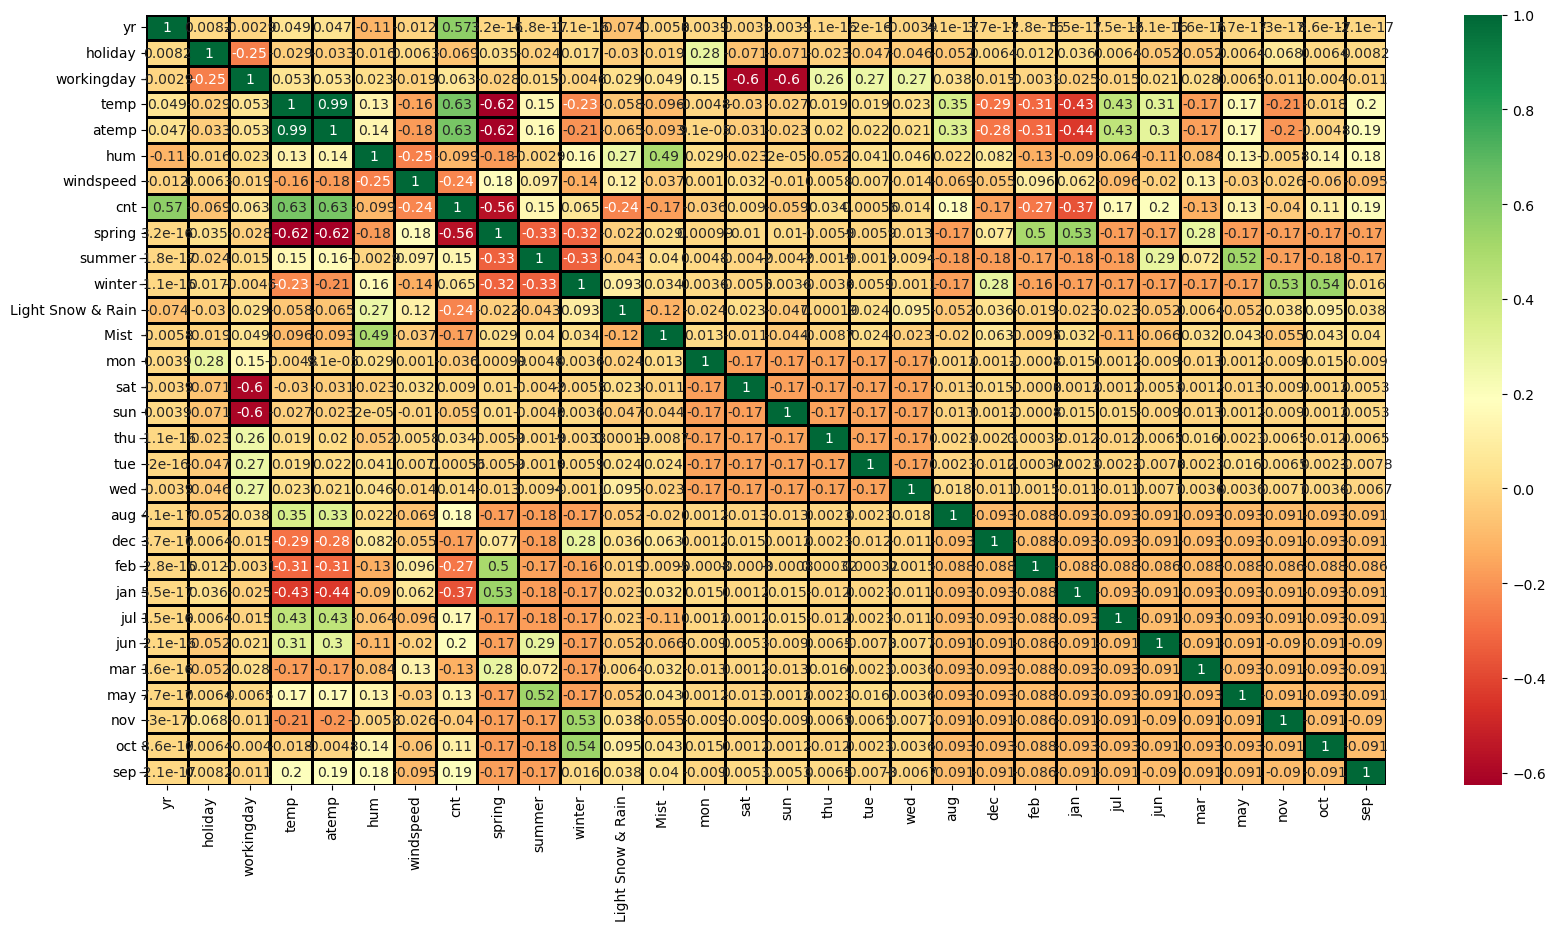

In [42]:
plt.figure(figsize = (20,10))
sns.heatmap(bike_df.corr(), cmap='RdYlGn',annot=True,linewidths=2,linecolor='black')
plt.show()

<h6 style="color: orange;">Insights</h6>

- Target Variable is highly positively correlated with predictor variable 'temp' , 'atemp' and 'yr'

In [44]:
bike_df.drop(columns = ['atemp'], inplace = True)

<h2> Splitting the Data into Training and Testing Sets </h2>

In [46]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

<h2> Rescaling the Features </h2>

In [48]:
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow & Rain,Mist,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow & Rain,Mist,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

<h2> Building a linear model using RFE </h2>

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
col = X_train.columns[rfe.support_]

In [56]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow & Rain', 'Mist ', 'sat', 'jan', 'jul',
       'sep'],
      dtype='object')

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Mist ', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1)]

In [58]:
X_train.columns[~rfe.support_]

Index(['mon', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jun', 'mar',
       'may', 'nov', 'oct'],
      dtype='object')

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

<h2> Building a linear model using StatsModel </h2>

<h5 style="color: blue;">Model 1</h5>

In [62]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train)

In [63]:
lm_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [64]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.31e-191
Time:                        23:05:34   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.03

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
10,Mist,2.29
0,yr,2.09
11,sat,1.98


<h5 style="color: blue;">Model 2 - Rebuilding the model without holiday as it is having relatively high p value</h5>

In [67]:
X = X_train.drop('holiday', axis=1)  

In [68]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [69]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [70]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.70e-191
Time:                        23:05:34   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2418      0.03

In [71]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.34
2,temp,17.65
1,workingday,4.73
4,windspeed,4.71
5,spring,4.48
7,winter,3.44
6,summer,2.83
9,Mist,2.28
0,yr,2.09
10,sat,1.84


<h5 style="color: blue;">Model 3 - Rebuilding the model without jan as it is having relatively high p value</h5>

In [73]:
X = X.drop('jan', axis=1)  

In [74]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [75]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()

In [76]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          8.51e-192
Time:                        23:05:34   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2298      0.03

In [77]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,spring,4.18
7,winter,3.40
6,summer,2.83
9,Mist,2.28
0,yr,2.08
10,sat,1.84


<h5 style="color: blue;">Model 4 - Rebuilding the model without spring as it is having relatively high p value</h5>

In [79]:
X = X.drop('spring', axis=1)  

In [80]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [81]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()

In [82]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.26e-191
Time:                        23:05:35   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1705      0.02

In [83]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.23
2,temp,10.35
1,workingday,4.53
4,windspeed,3.73
8,Mist,2.10
0,yr,2.03
9,sat,1.79
5,summer,1.76
6,winter,1.71
10,jul,1.55


<h5 style="color: blue;">Model 5 - Rebuilding the model without july as it is having relatively high p value</h5>

In [85]:
X = X.drop('jul', axis=1)  

In [86]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [87]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()

In [88]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.89e-191
Time:                        23:05:35   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1698      0.02

In [89]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
8,Mist,2.10
0,yr,2.02
9,sat,1.79
6,winter,1.66
5,summer,1.58
10,sep,1.20


<h5 style="color: blue;">Model 6 - Rebuilding the model without humidity as it is having relatively high VIF value</h5>

In [91]:
X = X.drop('hum', axis=1)  

In [92]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [93]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()

In [94]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.47e-188
Time:                        23:05:35   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0753      0.01

In [95]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
8,sat,1.69
4,summer,1.57
7,Mist,1.53
5,winter,1.40
9,sep,1.20
6,Light Snow & Rain,1.08


<h5 style="color: blue;">Now as we can see, the p-values and VIF both are within an acceptable range. So we go ahead and make our predictions using  model 6 only</h5>

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

<h5 style="color: blue;"> Assumption 1 : Error terms are normally distributed </h5>

In [99]:
y_train_pred = lm_6.predict(X_train_lm)

In [100]:
residuals = y_train - y_train_pred

Text(0.5, 0, 'Errors')

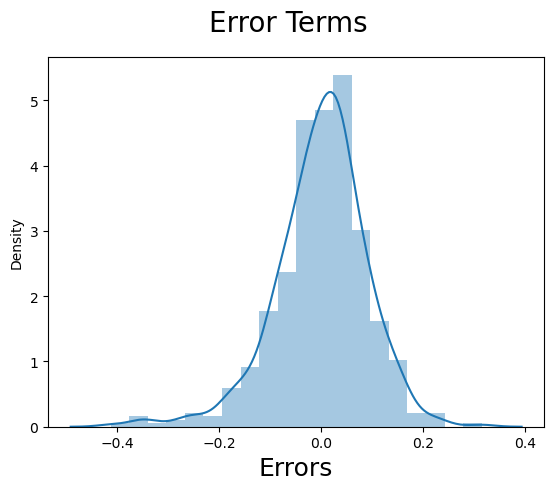

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Residuals form a bell-shaped curve, this suggests normality.

<h5 style="color: blue;">Assumption 2 : Error terms are independent of each other</h5>

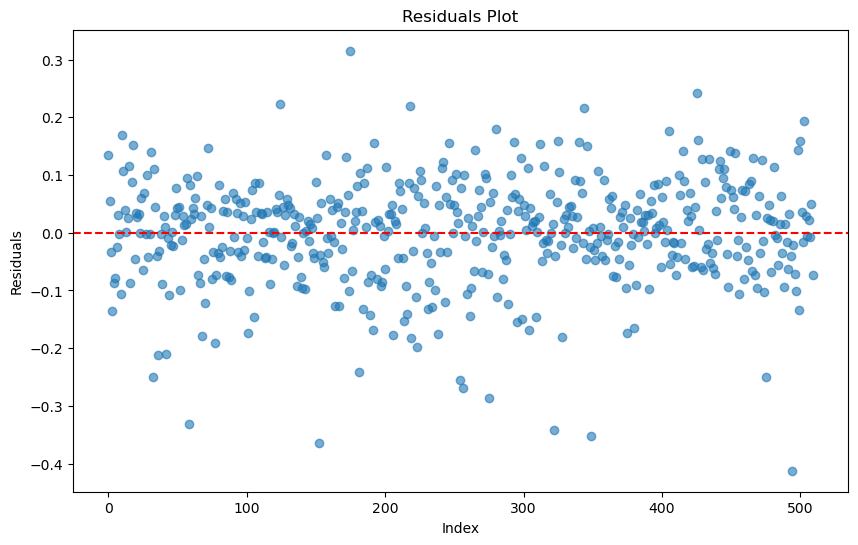

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

Residuals appear randomly scattered around zero without forming any discernible pattern, this suggests that the error terms are independent.

<h5 style="color: blue;"> Assumption 3 : Error terms have constant variance (homoscedasticity):</h5>

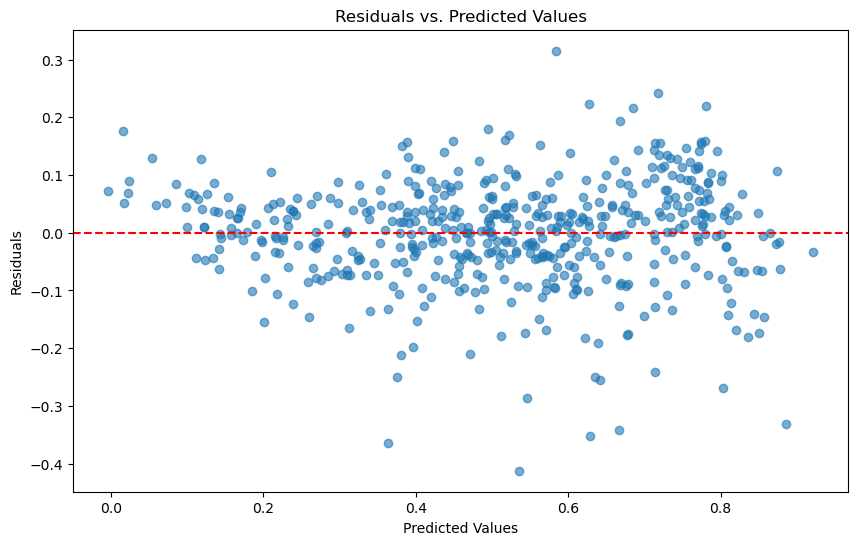

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The points are evenly distributed around the horizontal line at zero, it indicates that the variance of the error terms is constant (homoscedasticity)

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

In [110]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [111]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow & Rain,Mist,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [112]:
y_test = df_test.pop('cnt')
X_test = df_test[X.columns]

In [113]:
X_test = df_test[X.columns]

In [114]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [115]:
y_pred = lm_6.predict(X_test_lm)

## Model Evaluation

Let's Find out the R-Square of Final Model on Train Dataset and Test Dataset respectively

Text(0, 0.5, 'y_pred')

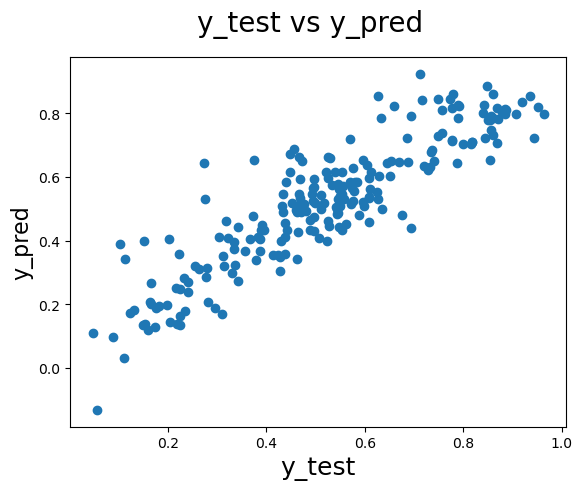

In [117]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [118]:
print('The R-Square of Final Model on Train Dataset is:- ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of Final Model on Test Dataset is:-  ',round(r2_score(y_test,y_pred),4))

The R-Square of Final Model on Train Dataset is:-  0.8358
The R-Square of Final Model on Test Dataset is:-   0.7956


In [119]:
lm_6.params

const                0.075325
yr                   0.233056
workingday           0.056323
temp                 0.549936
windspeed           -0.155238
summer               0.087429
winter               0.131826
Light Snow & Rain   -0.288021
Mist                -0.081347
sat                  0.067688
sep                  0.097236
dtype: float64

<h1 style="color: #663399; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 30px;">Conclusion</h1>

We can see that the equation of our best fitted line is:

<span style="color: blue; font-family: 'Arial'; font-size: 18px;">
cnt = 0.075325 + 0.233056 * yr - 0.056323 * workingday + 0.549936 * temp - 0.1552389 * windspeed + 0.087429 * summer + 0.131826 * winter - 0.288021 * (Light Snow & Rain) - 0.081347 * Mist + 0.067688 * sat + 0.097236 * sep
</span>

<ol style="font-family: 'Arial', sans-serif; font-size: 15px;">
    <li><strong>Year (yr)</strong>: A positive coefficient of 0.233 indicates that bike demand has increased over time, with the year being a significant predictor of growth in usage.</li>
    <li><strong>Temperature (temp)</strong>: The strong positive coefficient of 0.549 suggests that warmer temperatures significantly boost bike-sharing demand. This makes sense as favorable weather conditions encourage outdoor activities like biking.</li>
    <li><strong>Weather Conditions:</strong></li>
    <ul>
        <li><strong>Light Snow & Rain</strong>: With a negative coefficient of -0.288, light snow and rain lead to a considerable drop in bike-sharing demand, as adverse weather discourages outdoor commuting.</li>
        <li><strong>Mist</strong>: A smaller negative coefficient of -0.081 indicates a slight decrease in demand during misty conditions, though its impact is less severe than snow or rain.</li>
    </ul>
    <li><strong>Seasonal Influence:</strong></li>
    <ul>
        <li><strong>Summer (0.087)</strong> and <strong>Winter (0.131)</strong>: Both summer and winter show a positive impact on bike demand, with winter surprisingly showing a higher increase. This suggests that bike-sharing is consistently used throughout the year, potentially for commuting, regardless of seasonal extremes.</li>
    </ul>
    <li><strong>Day of the Week:</strong></li>
    <ul>
        <li><strong>Saturday (sat)</strong>: The positive coefficient of 0.067 suggests that bike-sharing demand is higher on Saturdays, possibly due to more leisure activities.</li>
    </ul>
    <li><strong>September (sep)</strong>: The coefficient of 0.097 indicates a further rise in demand during the month of September, reflecting favorable conditions for biking in early autumn.</li>
    <li><strong>Windspeed</strong>: The negative coefficient of -0.155 shows that higher wind speeds reduce bike demand, likely due to the difficulty of biking in strong winds.</li>
    <li><strong>Working Day</strong>: A slightly negative coefficient of -0.056 suggests that demand is lower on working days compared to weekends, as people may rely on alternative commuting methods during the workweek.</li>
</ol>

